# Cours sur l'algorithme KNN

### <span style="color:blue">*1 Exemple du cours*</span>  



<div style="border: 3px solid #A0A0A0; background: #A7C5DE; padding:10px "> 

Ce que font les différentes cellules : 
    
- **Récupérer** les données du fichier csv  
- **Créer** les listes de points pour les types 'chevalier' et 'fantassins'
- **Représenter** ces points
- **Introduire** un nouveau personnage cible
- **Utiliser** l'algrithme KNN pour trouver ses proches voisins
- **Predire** le type de la cible en fonction des plus proches voisins

    
</div>

In [1]:
# importer CSV

import csv

def lire_fichier_csv(nom_fichier):
    with  open(nom_fichier, 'r') as file :
        reader = csv.reader(file, delimiter = ';')        
        return [elem for elem in reader]

table_personnages = lire_fichier_csv('personnages.csv')

print(table_personnages)

[['Clark', '2', '12', 'Chevalier'], ['Martheen', '15', '19', 'Chevalier'], ['Mulen', '2', '5', 'Chevalier'], ['Louly', '15', '18', 'Chevalier'], ['Phark', '15', '7', 'Chevalier'], ['Tom', '4', '17', 'Chevalier'], ['Karl', '11', '9', 'Chevalier'], ['Korg', '1', '20', 'Chevalier'], ['Axal', '10', '10', 'Chevalier'], ['Tim', '12', '6', 'Chevalier'], ['Fanks', '16', '5', 'Chevalier'], ['louli', '20', '5', 'Chevalier'], ['Ario', '20', '1', 'Chevalier'], ['Marko', '1', '20', 'Chevalier'], ['Thoms', '15', '7', 'Chevalier'], ['Risk', '1', '10', 'Chevalier'], ['Loumi', '4', '12', 'Chevalier'], ['Quarx', '18', '6', 'Chevalier'], ['Lomo', '17', '20', 'Fantassin'], ['Cargo', '20', '11', 'Fantassin'], ['Syl', '5', '9', 'Fantassin'], ['Faq', '15', '11', 'Fantassin'], ['Tobby', '9', '12', 'Fantassin'], ['Helen', '8', '1', 'Fantassin'], ['Lis', '18', '18', 'Fantassin'], ['Syl', '10', '13', 'Fantassin'], ['Fancy', '9', '5', 'Fantassin'], ['Phyl', '4', '4', 'Fantassin'], ['Sal', '12', '16', 'Fantassin']

In [55]:
# Créer les listes

liste_chevalier_x=[]
liste_chevalier_y=[]
liste_fantassin_x=[]
liste_fantassin_y=[]

for perso in table_personnages :
    if perso[3] == 'Chevalier' :
        liste_chevalier_x.append(int(perso[1]))
        liste_chevalier_y.append(int(perso[2]))
                                  
    elif perso[3] == 'Fantassin' :
        liste_fantassin_x.append(int(perso[1]))
        liste_fantassin_y.append(int(perso[2]))
        
# print(liste_chevalier_x)
# print(liste_chevalier_y)
# print(liste_fantassin_x)
# print(liste_fantassin_y)

[2, 15, 2, 15, 15, 4, 11, 1, 10, 12, 16, 20, 20, 1, 15, 1, 4, 18]


In [2]:
# Créer les listes V2

coorChevalier = [[int(item[1]), int(item[2])] for item in table_personnages if item[3] == "Chevalier"]
coorFantassin = [[int(item[1]), int(item[2])] for item in table_personnages if item[3] == "Fantassin"] 
liste_chevalier_x = [x[0] for x in coorChevalier]
liste_chevalier_y = [x[1] for x in coorChevalier]
liste_fantassin_x = [x[0] for x in coorFantassin]
liste_fantassin_y = [x[1] for x in coorFantassin]
# print(liste_chevalier_x)
# print(liste_chevalier_y)
# print(liste_fantassin_x)
# print(liste_fantassin_y)

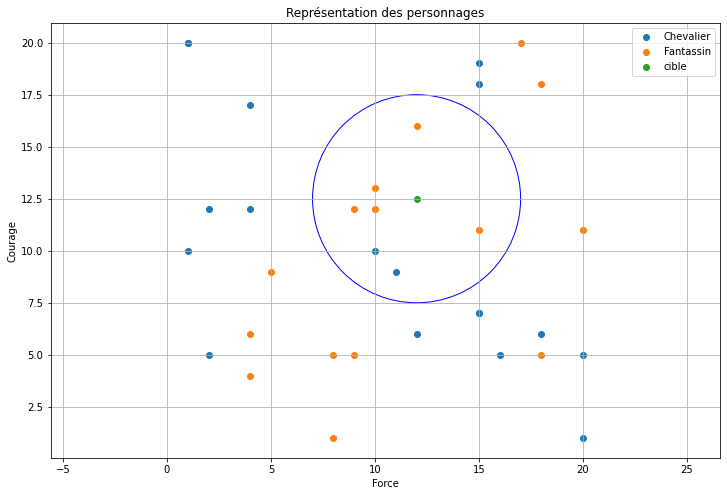

In [3]:
# Afficher , ajouter cible, ajouter cercle

import matplotlib.pyplot as plt

cible_dessin =(12, 12.5)

fig, ax = plt.subplots(figsize=(12,8)) # dimension du graphique
plt.axis([0,22, 0, 22]) # Les axes Attention [x1,x2,y1,y2]
plt.axis('equal') # Pour avoir un repère orthonormé
plt.xlabel('Force') 
plt.ylabel('Courage')
plt.title('Représentation des personnages')
plt.grid() # affichage du quadrillage

plt.scatter(liste_chevalier_x,liste_chevalier_y, label='Chevalier')
plt.scatter(liste_fantassin_x,liste_fantassin_y, label='Fantassin')
plt.scatter(cible_dessin[0], cible_dessin[1], label='cible') #Place une cible.

ax.add_artist(plt.Circle((cible_dessin[0], cible_dessin[1]), 5, edgecolor='b', facecolor='none')) # place un cercle de diamètre 5 

# ax.add_artist(
#     plt.Rectangle((-15, 10), 50, 5,
#                       edgecolor = 'yellow', facecolor = 'none',
#                       fill = True, hatch = '/', linestyle = 'dashed',
#                       linewidth = 3, zorder = 1))

# ax.add_artist(
#     plt.Rectangle((2.5,0), 5, 25,
#                       edgecolor = 'cyan', facecolor = 'none',
#                       fill = True, hatch = '/', linestyle = 'dashed',
#                       linewidth = 3, zorder = 1))




plt.legend() # affiche la légende

plt.show() # affiche le graphique complet

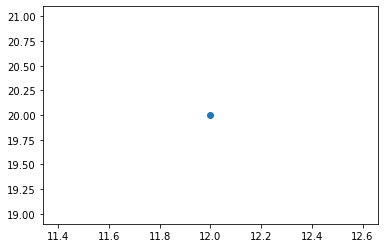

In [8]:
perso = {"type" : "fantassin", "force" : 12, "courage" : 20}

plt.scatter(perso["force"], perso["courage"], label=perso["type"])

In [84]:
# Recherche des voisins de la cible.

from math import *

table = table_personnages
cible=['popi', 12, 12.5] 
k = 7

def distance_cible(personnage) :
    distance = sqrt((cible[1]-int(personnage[1]))**2+(cible[2]-int(personnage[2]))**2)
    return distance

def k_plus_proches_voisins(table , cible, k) :    
    table_triee = sorted(table, key = distance_cible)  # haute voltige ici  
    proches_voisins = []
    for i in range(k) : 
        proches_voisins.append(table_triee[i])
    return proches_voisins

k_plus_proches_voisins(table,cible,k)

[['Syl', '10', '13', 'Fantassin'],
 ['Fool', '10', '12', 'Fantassin'],
 ['Tobby', '9', '12', 'Fantassin'],
 ['Axal', '10', '10', 'Chevalier'],
 ['Faq', '15', '11', 'Fantassin'],
 ['Sal', '12', '16', 'Fantassin'],
 ['Karl', '11', '9', 'Chevalier']]

In [85]:
def prediction(knn) : 
    nbFantassin = 0 
    nbChevalier = 0
    for elem in knn :
        if elem[3] == "Fantassin" : 
            nbFantassin +=1
        else :
            nbChevalier +=1
            
    chaine = "Fantassin" if nbFantassin>=nbChevalier  else "Chevalier"
    return chaine

prediction(k_plus_proches_voisins(table,cible,k))


'Fantassin'

In [86]:
def prediction2(knn) : 
    classes = ["Chevalier", "Fantassin"]    
    comptage = [len(  [item[3] for item in knn if item[3] == classe]  ) for classe in classes]
    #print(comptage)
    num = comptage.index(max(comptage))
    #print(num)
    return classes[num]    

prediction2(k_plus_proches_voisins(table,cible,k))

'Fantassin'

# TP2 sur l'algorithme KNN

### <span style="color:blue">**1. Utilisation simple des fonctions de SCIKIT**</span>  



<div style="border: 3px solid #A0A0A0; background: #A7C5DE; padding:10px "> 
    
Utilisation standard de prédiction 

    
</div>

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
Caractéristiques  = [[int(elem[1]), int(elem[2])] for elem in table_personnages]
Type = [elem[3] for elem in table_personnages]

k = 4

myKNN = KNeighborsClassifier(n_neighbors=k) # Classifieur avec réglage des paramètres 
myKNN.fit(Caractéristiques, Type) # "apprentissage de l'IA"

cible=[12, 12.5] #Désignation de la cible
# cible=[5, 12.5] #Désignation de la cible
print('la cible est un : ', myKNN.predict([cible])[0]) #Prédiction
print('la probalité de la cible est [Chevalier / Fantassin]: ', myKNN.predict_proba([cible])[0]) #Probabilités
print(f'le score de KNN pour k = {k} est : ', myKNN.score(Caractéristiques, Type)) #Score

la cible est un :  Fantassin
la probalité de la cible est [Chevalier / Fantassin]:  [0.25 0.75]
le score de KNN pour k = 4 est :  0.7575757575757576


### <span style="color:blue">*2. Utilisation avancée des fonctions de SCIKIT*</span>  



<div style="border: 3px solid #A0A0A0; background: #A7C5DE; padding:10px "> 
    
Pour aller beaucoup plus loin , choix du paramètre K

    
</div>

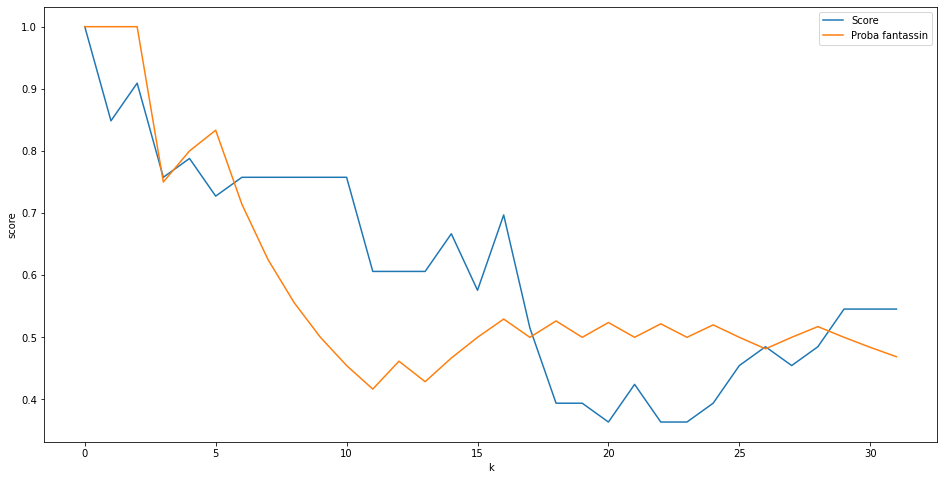

In [45]:
liste_score = []
liste_proba = []

for k in range(1,len(table_personnages)) :
    myKNN = KNeighborsClassifier(n_neighbors=k) # Classifieur avec réglage des paramètres 
    myKNN.fit(Caractéristiques, Type) # "apprentissage de l'IA"
    liste_score.append(myKNN.score(Caractéristiques, Type))
#     print(myKNN.score(Caractéristiques, Type)) #Score
    liste_proba.append(myKNN.predict_proba([cible])[0][1])
    
plt.figure(figsize=(16, 8))
plt.xlabel('k') 
plt.ylabel('score')
plt.plot(liste_score, label='Score')
plt.plot(liste_proba, label='Proba fantassin')
plt.legend() # affiche la légende
plt.show()

In [ ]:
# le meilleur choix pour la cible désignée est k = 1 ou k = 3 --> score > 90% et proba = 100%